<a href="https://colab.research.google.com/github/always-reach/GAN/blob/gan/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,LeakyReLU,BatchNormalization,Reshape
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [4]:
class GAN():
  def __init__(self):
    #mnist画像の幅
    self.image_row=28
    #mnist画像の高さ
    self.image_col=28
    #mnist画像のチャンネル数
    self.channels=1
    self.image_shape=(self.image_row,self.image_col,self.channels)
    #入力ノイズの次元数
    self.z_input_dim=100
    #最適化アルゴリズムはAdam
    optimizer=Adam()

    self.discriminator=self.build_discriminator()
    self.discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy"])

    self.generator=self.build_generator()
    self.combined=self.build_combined()
    self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

  def build_discriminator(self):
    image_shape=self.image_shape
    model=Sequential()
    #入力を平坦化
    model.add(Flatten(input_shape=image_shape))
    #全結合
    model.add(Dense(512))
    #LeakyReLU f(x)= ax(x<0) x(x>=0)
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1,activation='sigmoid'))

    model.summary()
    return model

  def build_generator(self):
    noise_shape=(self.z_input_dim,)
    model=Sequential()
    model.add(Dense(256,input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(self.image_shape),activation='tanh'))
    model.add(Reshape(self.image_shape))

    model.summary()
    return model

  def build_combined(self):
    self.discriminator.trainable=False
    model=Sequential([self.generator,self.discriminator])
    return model

  def train(self,epochs,batch_size=128,save_interval=100):
    (x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
    x_train=(x_train.astype(np.float32)-127.5)/127.5
    x_train=np.expand_dims(x_train,axis=3)

    half_batch=int(batch_size/2)

    for epoch in range(epochs):
      noise=np.random.normal(0,1,(half_batch,self.z_input_dim))
      gen_images=self.generator.predict(noise)
      print("gen_images.shape",gen_images.shape)
      index=np.random.randint(0,x_train.shape[0],half_batch)
      images=x_train[index]

      d_loss_real=self.discriminator.train_on_batch(images,np.ones((half_batch,1)))
      d_loss_fake=self.discriminator.train_on_batch(gen_images,np.zeros((half_batch,1)))

      d_loss=0.5*np.add(d_loss_real,d_loss_fake)

      noise=np.random.normal(0,1,(batch_size,self.z_input_dim))
      valid_y=np.array([1]*batch_size)
      g_loss=self.combined.train_on_batch(noise,valid_y)

      print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

      if (epoch+1) % save_interval==0:
        plt.figure(figsize=(10,10))
        x = gen_images[:10]
        for i in range(10):
          plt.subplot(1,10, i+1)
          # 画像を見やすいように座標軸を非表示にする。
          plt.axis("off")
          # 画像を表示
          plt.imshow(x[i].reshape([28,28]), cmap='gray')
        plt.tight_layout()
        plt.show()


176 [D loss: 0.080432, acc.: 97.66%] [G loss: 13.526015]
gen_images.shape (64, 28, 28, 1)
177 [D loss: 0.069740, acc.: 98.44%] [G loss: 13.857890]
gen_images.shape (64, 28, 28, 1)
178 [D loss: 0.059332, acc.: 97.66%] [G loss: 11.996716]
gen_images.shape (64, 28, 28, 1)
179 [D loss: 0.127272, acc.: 94.53%] [G loss: 11.347498]
gen_images.shape (64, 28, 28, 1)
180 [D loss: 0.024398, acc.: 98.44%] [G loss: 12.105685]
gen_images.shape (64, 28, 28, 1)
181 [D loss: 0.014723, acc.: 100.00%] [G loss: 12.061549]
gen_images.shape (64, 28, 28, 1)
182 [D loss: 0.008149, acc.: 100.00%] [G loss: 11.375701]
gen_images.shape (64, 28, 28, 1)
183 [D loss: 0.009958, acc.: 100.00%] [G loss: 10.059889]
gen_images.shape (64, 28, 28, 1)
184 [D loss: 0.015011, acc.: 99.22%] [G loss: 9.174266]
gen_images.shape (64, 28, 28, 1)
185 [D loss: 0.009761, acc.: 100.00%] [G loss: 8.451920]
gen_images.shape (64, 28, 28, 1)
186 [D loss: 0.004931, acc.: 100.00%] [G loss: 8.255083]
gen_images.shape (64, 28, 28, 1)
187 [D l

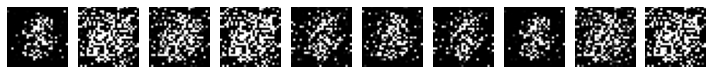

gen_images.shape (64, 28, 28, 1)
200 [D loss: 0.007779, acc.: 100.00%] [G loss: 8.109751]
gen_images.shape (64, 28, 28, 1)
201 [D loss: 0.004318, acc.: 100.00%] [G loss: 8.570860]
gen_images.shape (64, 28, 28, 1)
202 [D loss: 0.003953, acc.: 100.00%] [G loss: 8.932018]
gen_images.shape (64, 28, 28, 1)
203 [D loss: 0.005403, acc.: 100.00%] [G loss: 8.493963]
gen_images.shape (64, 28, 28, 1)
204 [D loss: 0.004290, acc.: 100.00%] [G loss: 8.072946]
gen_images.shape (64, 28, 28, 1)
205 [D loss: 0.005073, acc.: 100.00%] [G loss: 7.792634]
gen_images.shape (64, 28, 28, 1)
206 [D loss: 0.014070, acc.: 99.22%] [G loss: 7.320251]
gen_images.shape (64, 28, 28, 1)
207 [D loss: 0.007837, acc.: 100.00%] [G loss: 7.671272]
gen_images.shape (64, 28, 28, 1)
208 [D loss: 0.009318, acc.: 100.00%] [G loss: 8.305604]
gen_images.shape (64, 28, 28, 1)
209 [D loss: 0.008411, acc.: 100.00%] [G loss: 8.712552]
gen_images.shape (64, 28, 28, 1)
210 [D loss: 0.003207, acc.: 100.00%] [G loss: 9.498063]
gen_images.

KeyboardInterrupt: ignored

In [5]:
gan=GAN()
gan.train(epochs=20000)
